In [1]:
import numpy as np
import pandas as pd

In [2]:
X = pd.read_csv('df_input_to_ga.csv')
target = pd.read_csv('../cleaned-data-frames/target-electricity-consumption.csv')

In [3]:
# making the lengths the same

X = X*10000
X = X.iloc[0:7536,:]
X = X.drop(columns = 'Unnamed: 0')

In [4]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

#X = clean_dataset(X)
#target = clean_dataset(target)

In [5]:
target_vector = target['Consumption']
input = X

In [6]:
target_vector

0       15417.0
1       14891.0
2       14506.0
3       14226.0
4       14211.0
         ...   
7531    17489.0
7532    16750.0
7533    15963.0
7534    15060.0
7535    14126.0
Name: Consumption, Length: 7536, dtype: float64

In [7]:
X

,AWT26_Power(albany),AWP_200_Power(albany),D2CF_200_Power(albany),AN_Bonus_150/30_Power(albany),Aria_20_Power(albany),WWD-1_D64_Power(albany),Solar_AllMax(albany),Solar_TrinaSolar(albany),Solar_Mitsubishi(albany),Solar_FirstSolar(albany),...,D2CF_200_Power(rochester),AN_Bonus_150/30_Power(rochester),Aria_20_Power(rochester),WWD-1_D64_Power(rochester),AWT26_Power(nyc),AWP_200_Power(nyc),D2CF_200_Power(nyc),AN_Bonus_150/30_Power(nyc),Aria_20_Power(nyc),WWD-1_D64_Power(nyc)
0,0.136386,0.193176,0.439799,0.374229,0.036428,1.725831,0.0,0.0,0.0,0.0,...,0.787639,0.789540,0.056800,3.089083,0.780184,0.729966,1.217985,1.143458,0.078807,4.742065
1,0.136386,0.193176,0.439799,0.374229,0.036428,1.725831,0.0,0.0,0.0,0.0,...,0.710669,0.707542,0.052568,2.782100,0.780184,0.729966,1.217985,1.143458,0.078807,4.742065
2,0.116604,0.165659,0.407066,0.335845,0.034483,1.604504,0.0,0.0,0.0,0.0,...,0.748565,0.748882,0.054674,2.933339,0.740668,0.708286,1.174633,1.112606,0.076592,4.583050
3,0.136386,0.193176,0.439799,0.374229,0.036428,1.725831,0.0,0.0,0.0,0.0,...,0.673941,0.665662,0.050484,2.635616,0.740668,0.708286,1.174633,1.112606,0.076592,4.583050
4,0.136386,0.193176,0.439799,0.374229,0.036428,1.725831,0.0,0.0,0.0,0.0,...,0.710669,0.707542,0.052568,2.782100,0.740668,0.708286,1.174633,1.112606,0.076592,4.583050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531,0.116604,0.165659,0.407066,0.335845,0.034483,1.604504,0.0,0.0,0.0,0.0,...,0.504479,0.454809,0.040359,1.970426,0.780184,0.729966,1.217985,1.143458,0.078807,4.742065
7532,0.098177,0.139209,0.373651,0.299130,0.032549,1.482213,0.0,0.0,0.0,0.0,...,0.537014,0.496428,0.042347,2.095820,0.740668,0.708286,1.174633,1.112606,0.076592,4.583050
7533,0.098177,0.139209,0.373651,0.299130,0.032549,1.482213,0.0,0.0,0.0,0.0,...,0.537014,0.496428,0.042347,2.095820,0.740668,0.708286,1.174633,1.112606,0.076592,4.583050
7534,0.098177,0.139209,0.373651,0.299130,0.032549,1.482213,0.0,0.0,0.0,0.0,...,0.504479,0.454809,0.040359,1.970426,0.662385,0.663375,1.086477,1.047992,0.072143,4.253532


In [8]:
# recognising the solution space for this data:

magnitude_of_consumption_values = np.min(target['Consumption'])

magnitude_of_consumption_values

0.0

In [9]:
min_values = []
max_values = []

min = (5/X.iloc[13,:])
min = min.round(0)
min_values.append(min)

max = (1000/X.iloc[13,:])
max = max.round(0)
max_values.append(max)

In [10]:
weights_size = len(input.iloc[0])
solutions_per_problem = 800

pop_size = (solutions_per_problem, weights_size)
new_population = np.empty(shape= pop_size)

pop = []

for i in range(solutions_per_problem):
    for j in range(34):
        new_population[i][j] = np.random.randint(low = min_values[0][j], high= max_values[0][j])
    
    

In [11]:
new_population[0]

array([  385.,   340.,   656.,   524.,  1291.,   240.,   572.,   633.,
          22.,   586.,   327.,  1132.,   444.,   516.,  6135.,    90.,
         324.,  1346.,   159.,   999., 11076.,   171.,  1016.,    84.,
         533.,   431., 11197.,   157.,   620.,   675.,   269.,   627.,
        4556.,    88.])

In [12]:
min_values

[AWT26_Power(albany)                   9.0
 AWP_200_Power(albany)                 8.0
 D2CF_200_Power(albany)                5.0
 AN_Bonus_150/30_Power(albany)         5.0
 Aria_20_Power(albany)                74.0
 WWD-1_D64_Power(albany)               1.0
 Solar_AllMax(albany)                  4.0
 Solar_TrinaSolar(albany)              4.0
 Solar_Mitsubishi(albany)              4.0
 Solar_FirstSolar(albany)              4.0
 AWT26_Power(buffalo)                  5.0
 AWP_200_Power(buffalo)                6.0
 D2CF_200_Power(buffalo)               3.0
 AN_Bonus_150/30_Power(buffalo)        4.0
 Aria_20_Power(buffalo)               55.0
 WWD-1_D64_Power(buffalo)              1.0
 AWT26_Power(binghamton)               9.0
 AWP_200_Power(binghamton)             8.0
 D2CF_200_Power(binghamton)            5.0
 AN_Bonus_150/30_Power(binghamton)     5.0
 Aria_20_Power(binghamton)            74.0
 WWD-1_D64_Power(binghamton)           1.0
 AWT26_Power(rochester)                7.0
 AWP_200_Po

In [13]:
max_values

[AWT26_Power(albany)                   1707.0
 AWP_200_Power(albany)                 1623.0
 D2CF_200_Power(albany)                1002.0
 AN_Bonus_150/30_Power(albany)         1021.0
 Aria_20_Power(albany)                14771.0
 WWD-1_D64_Power(albany)                255.0
 Solar_AllMax(albany)                   741.0
 Solar_TrinaSolar(albany)               741.0
 Solar_Mitsubishi(albany)               742.0
 Solar_FirstSolar(albany)               741.0
 AWT26_Power(buffalo)                   985.0
 AWP_200_Power(buffalo)                1170.0
 D2CF_200_Power(buffalo)                689.0
 AN_Bonus_150/30_Power(buffalo)         763.0
 Aria_20_Power(buffalo)               10913.0
 WWD-1_D64_Power(buffalo)               180.0
 AWT26_Power(binghamton)               1707.0
 AWP_200_Power(binghamton)             1623.0
 D2CF_200_Power(binghamton)            1002.0
 AN_Bonus_150/30_Power(binghamton)     1021.0
 Aria_20_Power(binghamton)            14771.0
 WWD-1_D64_Power(binghamton)      

In [14]:
# fitness of each population:


def cal_pop_fitness(target_dataframe, electricity_values, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calculates the sum of products between each input and its corresponding weight.
    generated_electricity = np.sum(pop*electricity_values, axis=1);
    required_electricity =  target_vector
    error = required_electricity - generated_electricity
    error = error.abs()
    error = error.sum()
    fitness = 1/error
    
    return fitness


In [15]:
# Select the best parents for mating process:

def select_mating_pool(pop, fitness, number_of_parents):
    parents = np.empty((number_of_parents, new_population.shape[1]))

    for instance in range(number_of_parents):
        max_index = np.where(fitness == np.max(fitness))
        max_index = max_index[0][0]
        parents[instance, :] = pop[max_index, :]
        fitness[max_index] = -9999

    return parents

In [16]:
# The mating process with each parent

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    
    # Choose mating (crossover) point randomly:
    
    division_point =  np.random.randint(low = 2, high= 4 )
    
    
    crossover_point = np.uint8(offspring_size[1]/ division_point )
 
    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

In [17]:
# Mutations on the offsprings:

mutation_probability = 80 # In percent

def mutation(offspring_crossover):
    
    offspring_operated = offspring_crossover

    # Mutation changes a single gene in each offspring randomly.
    
    prob = np.random.randint(low = 0, high = 100)
    
    
    if prob < mutation_probability :
        
        for idx in range(offspring_operated.shape[0]):

        # The random value to be added to the gene.

            random_value = np.random.randint(low = 0 , high= 10)
            
            # select the column to be mutated
            
            col = np.random.randint(low = 0, high = 33)

            offspring_operated[idx, col] = offspring_operated[idx, col] + random_value
                  

    return offspring_operated

In [18]:
num_generations = 100

num_parents_mating = 12

fitness = np.empty(new_population.shape[0])

best_fitnesses = []

for generation in range(num_generations):
     # Measuring the fitness of each chromosome in the population.
        
    for i in range(len(new_population)):
        fitness[i] = cal_pop_fitness(target_vector,X, new_population[i])
        
    #print("Fitness")    
    #print(fitness)   
    
    #max_index_fitness = np.where(fitness == np.max(fitness))
    #max_fit = fitness[max_index_fitness]
    
    best_fitnesses.append(np.max(fitness))


    # The best result in the current iteration.
    #print("Best result : ", np.max(np.sum(new_population*XX1, axis=1)))
    
    # Selecting the best parents in the population for mating.
    
    parents = select_mating_pool(new_population, fitness, 
                                       num_parents_mating)
        
    
    prob = np.random.randint(low = 0, high = 100)
    
    if prob < 100 :
        
        print("Parents")    
        print(parents)  
 
     # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                        offspring_size=(pop_size[0]-parents.shape[0], weights_size))
    
    #print("offspring_crossover")    
    #print(offspring_crossover)
 
     # Adding some variations to the offsrping using mutation.
    offspring_mutation = mutation(offspring_crossover)
    
# Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.


for i in range(len(new_population)):
        fitness[i] = cal_pop_fitness(target_vector, X, new_population[i])
                
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])


best_solution = new_population[best_match_idx, :]

Parents
[[7.8100e+02 5.1700e+02 5.4300e+02 6.3700e+02 7.9130e+03 1.4300e+02
  3.5700e+02 4.9800e+02 3.6500e+02 1.5300e+02 6.9400e+02 7.5600e+02
  5.0800e+02 6.2500e+02 9.9690e+03 4.5000e+01 2.9800e+02 1.3500e+03
  5.8000e+02 4.7400e+02 1.1611e+04 8.7000e+01 7.6400e+02 3.9600e+02
  7.3400e+02 1.9700e+02 1.0491e+04 1.9500e+02 9.2200e+02 9.2200e+02
  4.2300e+02 7.3100e+02 1.0073e+04 6.5000e+01]
 [8.9500e+02 2.3300e+02 8.6200e+02 6.4100e+02 6.5900e+03 8.1000e+01
  5.3100e+02 7.2700e+02 3.4600e+02 2.3400e+02 2.6300e+02 5.4800e+02
  2.5700e+02 3.2000e+02 5.3070e+03 1.5900e+02 1.0750e+03 5.0800e+02
  7.5100e+02 4.3600e+02 6.6490e+03 2.4900e+02 2.0800e+02 1.1360e+03
  3.7300e+02 5.3700e+02 5.5820e+03 1.7900e+02 2.9700e+02 1.1980e+03
  6.7500e+02 7.7400e+02 9.1530e+03 1.6800e+02]
 [6.9500e+02 5.5200e+02 3.8500e+02 6.7900e+02 8.9640e+03 6.2000e+01
  1.4600e+02 2.1000e+02 5.8200e+02 6.4100e+02 8.0400e+02 1.0080e+03
  5.2000e+02 6.9000e+02 6.8990e+03 7.2000e+01 3.4900e+02 2.6200e+02
  7.8300e+02 9

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   626.   672.  5133.   153.  1490.   508.   751.   436.
   6649.   262.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    682.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   626.   672.  5133.   153.  1490.   508.   751.   436.
   6649.   255.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    691.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   626.   672.  5133.   153.  1490.   508.   751.   436.
   6649.   255.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    682.   783.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   626.   672.  5133.   156.  1490.   508.   751.   436.
   6649.   255.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    682.   774.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   672.  5133.   179.  1490.   508.   751.   436.
   6649.   255.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    682.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   626.   672.  5133.   178.  1490.   508.   751.   436.
   6649.   255.   208.  1136.   373.   537.  5582.   185.   297.  1198.
    682.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   672.  5133.   178.  1490.   508.   751.   436.
   6649.   255.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    682.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   672.  5133.   178.  1490.   508.   751.   436.
   6649.   255.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    682.   774.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   672.  5133.   201.  1490.   508.   751.   436.
   6649.   270.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    682.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   672.  5133.   200.  1490.   508.   751.   436.
   6649.   270.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    682.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   672.  5133.   199.  1490.   508.   751.   436.
   6649.   270.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    682.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   672.  5133.   193.  1490.   508.   751.   436.
   6649.   278.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    682.   774.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   672.  5133.   218.  1490.   508.   751.   436.
   6649.   279.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    690.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   672.  5133.   218.  1490.   508.   751.   436.
   6649.   279.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    688.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   672.  5133.   218.  1490.   508.   751.   436.
   6649.   279.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    682.   780.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   672.  5133.   218.  1490.   508.   751.   436.
   6649.   279.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    687.   774.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   234.  1490.   508.   751.   436.
   6649.   288.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    690.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   233.  1490.   508.   751.   436.
   6649.   288.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    690.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   233.  1490.   508.   751.   436.
   6649.   288.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    690.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   233.  1490.   508.   751.   436.
   6649.   288.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    690.   774.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   251.  1490.   508.   751.   436.
   6649.   288.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    690.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   251.  1490.   508.   751.   436.
   6649.   288.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    690.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   251.  1490.   508.   751.   436.
   6649.   288.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    690.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   250.  1490.   508.   751.   436.
   6649.   288.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    690.   774.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   273.  1490.   508.   751.   436.
   6649.   304.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    690.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   267.  1490.   508.   751.   436.
   6649.   297.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   265.  1490.   508.   751.   436.
   6649.   306.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    698.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   268.  1490.   508.   751.   436.
   6649.   301.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    698.   774.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   283.  1490.   508.   751.   436.
   6649.   313.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    698.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   282.  1490.   508.   751.   436.
   6649.   313.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    698.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   276.  1490.   508.   751.   436.
   6649.   321.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    698.   774.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   281.  1490.   508.   751.   436.
   6649.   313.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    698.   774.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   305.  1490.   508.   751.   436.
   6649.   320.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    698.   783.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   299.  1490.   508.   751.   436.
   6649.   328.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    698.   783.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   299.  1490.   508.   751.   436.
   6649.   328.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    698.   783.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   298.  1490.   508.   751.   436.
   6649.   327.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    698.   783.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   321.  1490.   508.   751.   436.
   6649.   320.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    698.   783.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   321.  1490.   508.   751.   436.
   6649.   320.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    698.   783.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   320.  1490.   508.   751.   436.
   6649.   320.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    698.   783.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   320.  1490.   508.   751.   436.
   6649.   320.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    698.   783.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   346.  1490.   508.   751.   436.
   6649.   334.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   783.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   344.  1490.   508.   751.   436.
   6649.   334.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   783.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   337.  1490.   508.   751.   436.
   6649.   343.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   783.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   337.  1490.   508.   751.   436.
   6649.   343.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   783.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   363.  1490.   508.   751.   436.
   6649.   334.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   783.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   356.  1490.   508.   751.   436.
   6649.   342.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   783.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   355.  1490.   508.   751.   436.
   6649.   343.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   783.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   361.  1490.   508.   751.   436.
   6649.   334.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   783.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   376.  1490.   508.   751.   436.
   6649.   351.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   790.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   377.  1490.   508.   751.   436.
   6649.   351.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    712.   783.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   368.  1490.   508.   751.   436.
   6649.   359.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   791.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   368.  1490.   508.   751.   436.
   6649.   360.   208.  1136.   373.   537.  5582.   179.   297.  1207.
    707.   783.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   395.  1490.   508.   751.   436.
   6649.   368.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   791.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   392.  1490.   508.   751.   436.
   6649.   368.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   791.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   386.  1490.   508.   751.   436.
   6649.   376.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   791.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   386.  1490.   508.   751.   436.
   6649.   368.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   800.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   412.  1490.   508.   751.   436.
   6649.   368.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   800.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   412.  1490.   508.   751.   436.
   6649.   374.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   791.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   406.  1490.   508.   751.   436.
   6649.   376.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   799.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   407.  1490.   508.   751.   436.
   6649.   376.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    713.   791.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   427.  1490.   508.   751.   436.
   6649.   385.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   799.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   426.  1490.   508.   751.   436.
   6649.   385.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   799.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   426.  1490.   508.   751.   436.
   6649.   385.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   799.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   426.  1490.   508.   751.   436.
   6649.   385.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   799.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   443.  1490.   508.   751.   436.
   6649.   385.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   799.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   442.  1490.   508.   751.   436.
   6649.   385.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   799.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   442.  1490.   508.   751.   436.
   6649.   385.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   799.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   436.  1490.   508.   751.   436.
   6649.   393.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    707.   799.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   461.  1490.   508.   751.   436.
   6649.   392.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    716.   807.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   460.  1490.   508.   751.   436.
   6649.   392.   208.  1136.   373.   537.  5582.   179.   297.  1198.
    716.   807.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   458.  1490.   508.   751.   436.
   6649.   393.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    716.   807.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   458.  1490.   508.   751.   436.
   6649.   385.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    716.   816.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   478.  1490.   508.   751.   436.
   6649.   393.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    716.   816.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   478.  1490.   508.   751.   436.
   6649.   393.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    716.   816.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   478.  1490.   508.   751.   436.
   6649.   393.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    716.   816.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   478.  1490.   508.   751.   436.
   6649.   393.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    716.   816.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   495.  1490.   508.   751.   436.
   6649.   402.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    716.   816.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   493.  1490.   508.   751.   436.
   6649.   402.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    716.   816.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   486.  1490.   508.   751.   436.
   6649.   411.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    716.   816.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   486.  1490.   508.   751.   436.
   6649.   402.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    716.   825.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   503.  1490.   508.   751.   436.
   6649.   409.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    716.   825.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   503.  1490.   508.   751.   436.
   6649.   409.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    716.   825.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   503.  1490.   508.   751.   436.
   6649.   409.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    716.   825.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   503.  1490.   508.   751.   436.
   6649.   409.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    716.   825.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   518.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    716.   825.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   518.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    716.   825.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   518.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    716.   825.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   518.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    716.   825.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   525.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    725.   834.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   525.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    734.   825.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   525.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    725.   833.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   525.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    725.   832.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   543.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    725.   832.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   543.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    725.   832.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   543.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    725.   832.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   543.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    725.   832.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   552.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    725.   840.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   558.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    725.   832.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   551.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    725.   841.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   551.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    725.   841.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   574.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    733.   849.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   567.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    733.   856.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   573.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    740.   841.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   572.  1490.   508.   751.   436.
   6649.   418.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    733.   849.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   586.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    742.   855.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   586.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    742.   855.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   586.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    742.   855.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   586.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    742.   855.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   595.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    751.   872.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   595.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    759.   864.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   603.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    742.   872.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   594.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    742.   880.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   610.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    751.   889.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   610.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    751.   889.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   610.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    751.   889.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   610.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    751.   889.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   610.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    760.   905.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   610.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    776.   889.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   610.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    751.   913.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   610.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    785.   880.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   610.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    768.   923.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   610.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    768.   923.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   610.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    777.   914.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   610.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    778.   913.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   627.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1210.
    819.   888.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   619.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    792.   923.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   625.  1490.   508.   751.   436.
   6649.   432.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    777.   930.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   619.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    811.   904.  9153.   168.]
 [  

Parents
[[  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   627.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    817.   923.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   627.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    816.   923.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   627.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    806.   932.  9153.   168.]
 [  132.   132.   372.   376. 13757.   235.   334.   556.   470.   563.
    764.   265.   635.   677.  5133.   635.  1490.   508.   751.   436.
   6649.   424.   208.  1136.   373.   537.  5582.   179.   297.  1202.
    792.   941.  9153.   168.]
 [  

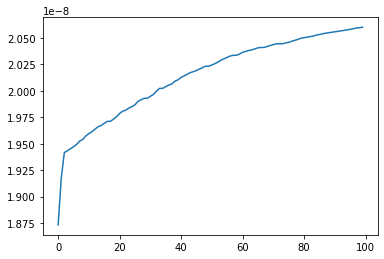

In [19]:
import matplotlib.pyplot as plt

plt.plot(best_fitnesses)




In [20]:
final_electricity = np.sum(best_solution[0][0]*X, axis = 1)

In [21]:
error = target['Consumption'] - final_electricity


day = np.arange(len(error))
day1 = np.arange(len(error) - 1)

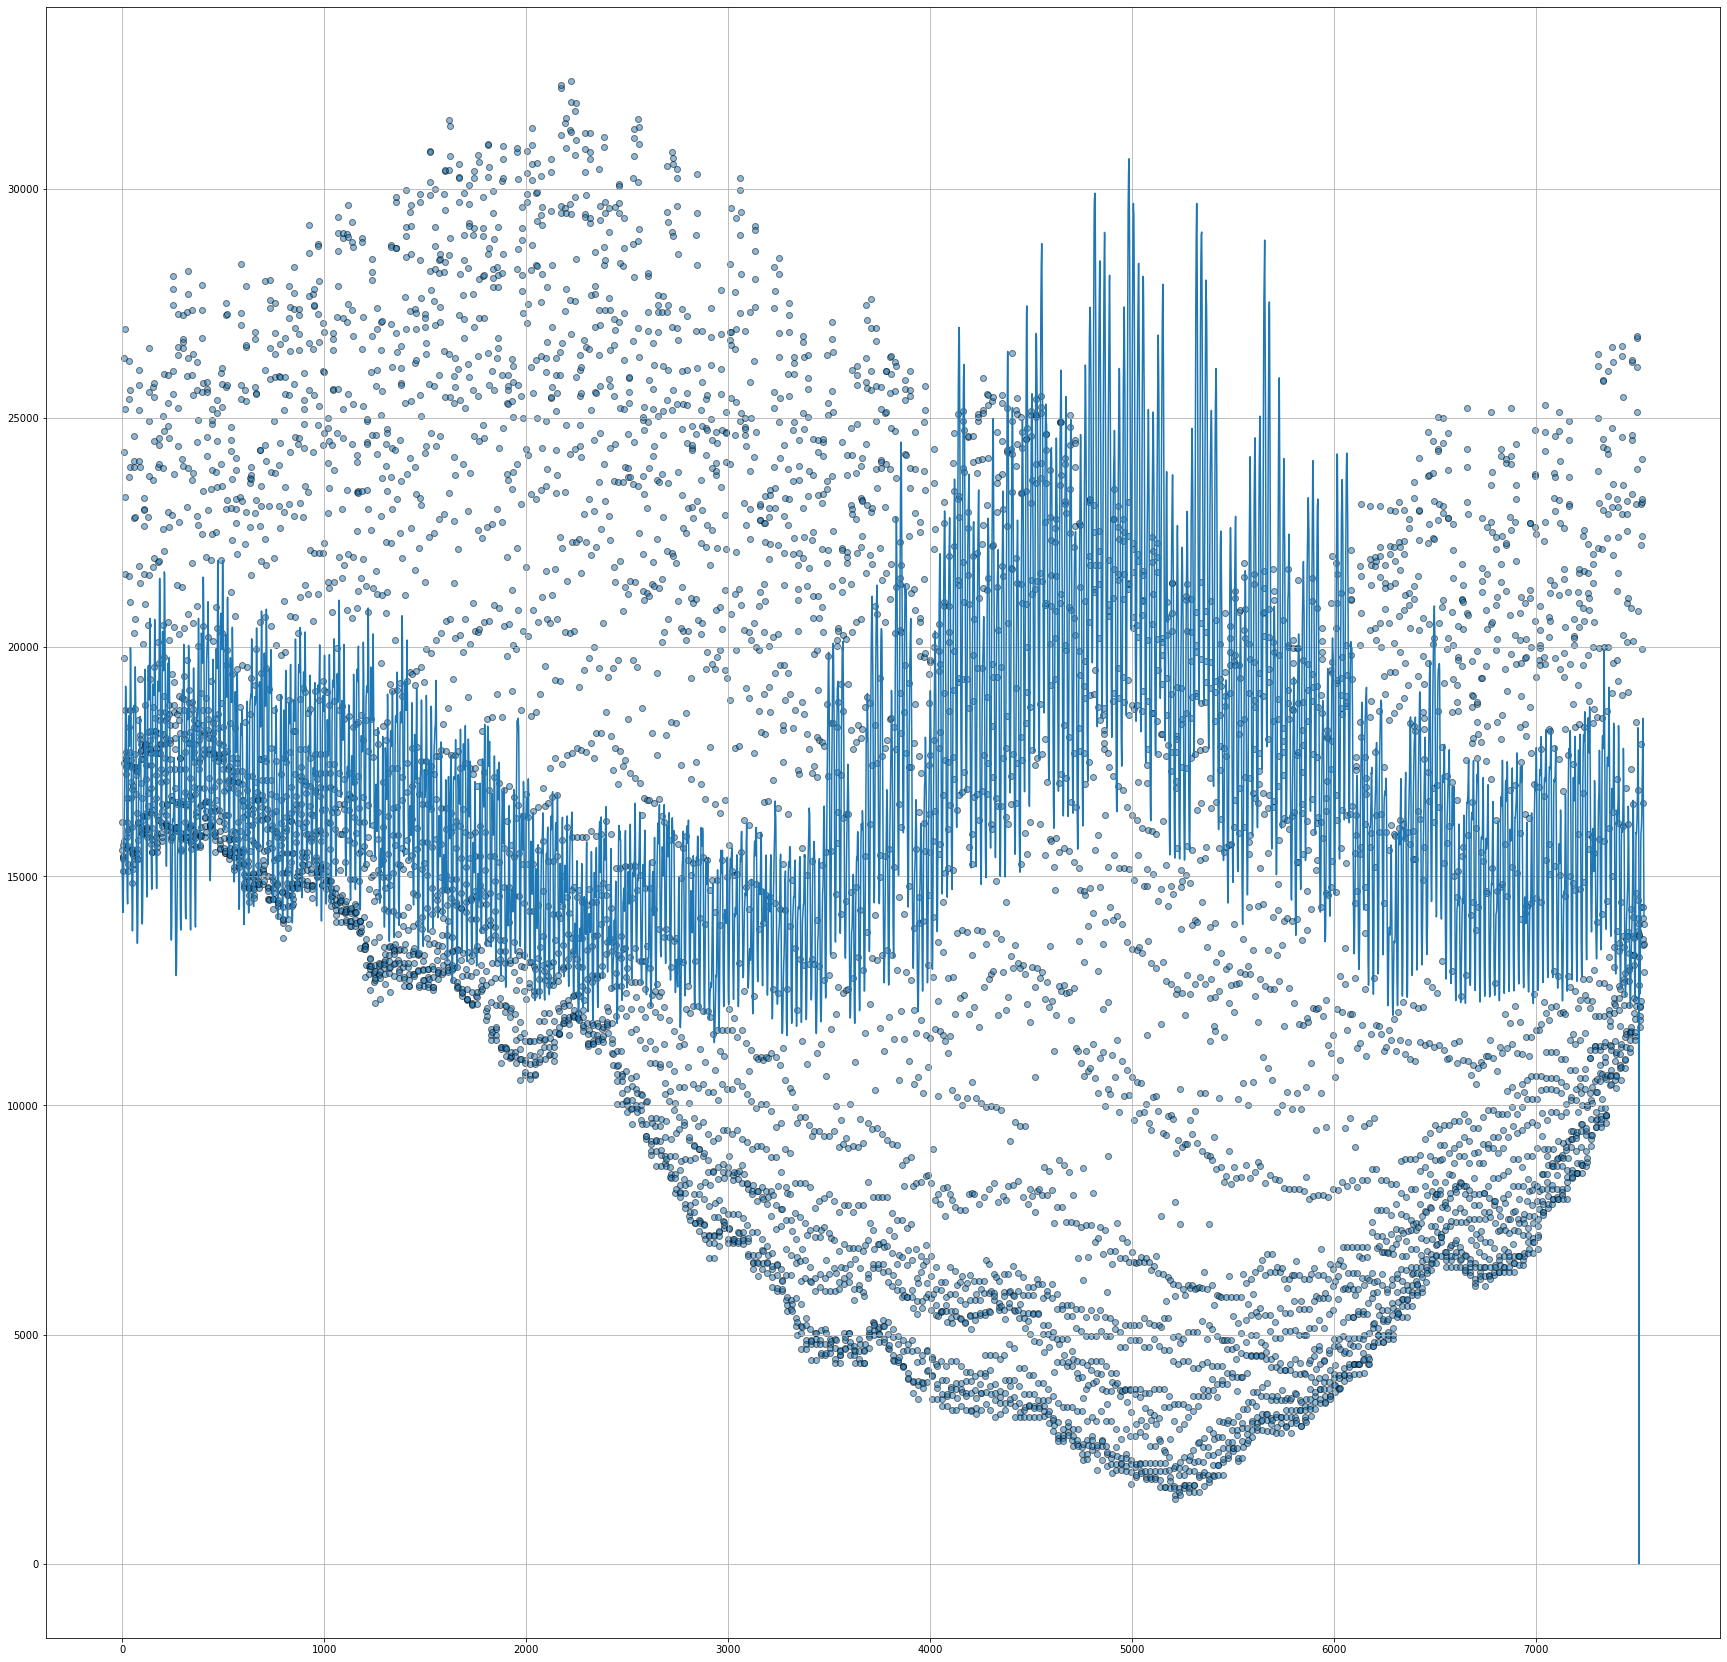

In [22]:
plt.figure(figsize=(30,30))

plt.scatter(x = day, y = final_electricity, alpha = 0.5, edgecolors= 'black')

plt.plot(day, target['Consumption'])


plt.grid()

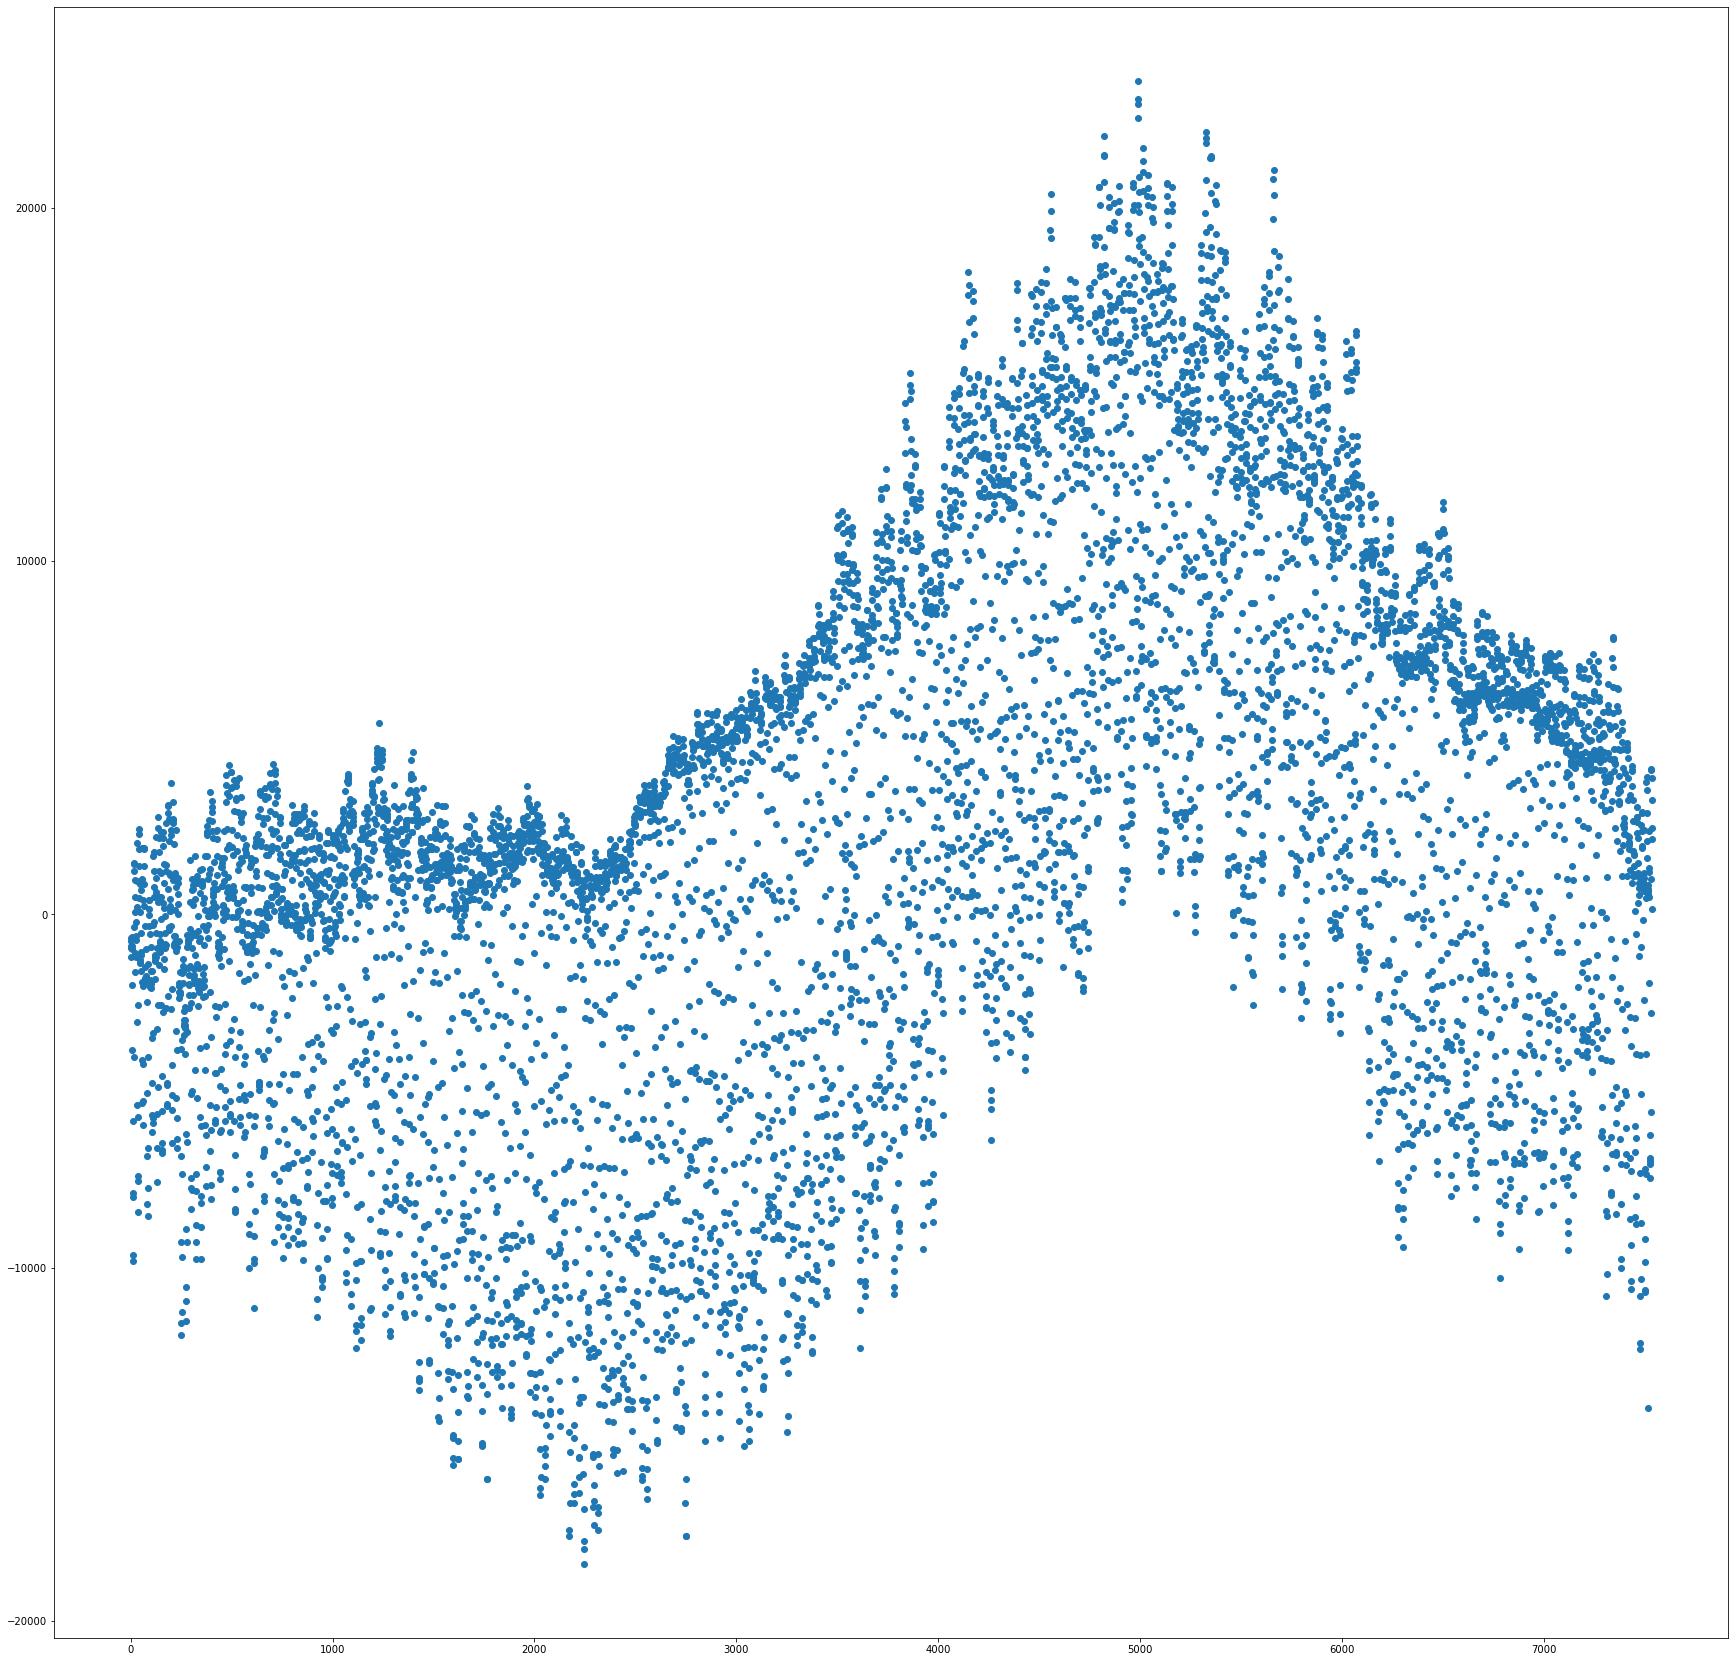

In [23]:
plt.figure(figsize=(30,30))

plt.scatter(day, error)

In [24]:
X.columns

Index(['AWT26_Power(albany)', 'AWP_200_Power(albany)',
       'D2CF_200_Power(albany)', 'AN_Bonus_150/30_Power(albany)',
       'Aria_20_Power(albany)', 'WWD-1_D64_Power(albany)',
       'Solar_AllMax(albany)', 'Solar_TrinaSolar(albany)',
       'Solar_Mitsubishi(albany)', 'Solar_FirstSolar(albany)',
       'AWT26_Power(buffalo)', 'AWP_200_Power(buffalo)',
       'D2CF_200_Power(buffalo)', 'AN_Bonus_150/30_Power(buffalo)',
       'Aria_20_Power(buffalo)', 'WWD-1_D64_Power(buffalo)',
       'AWT26_Power(binghamton)', 'AWP_200_Power(binghamton)',
       'D2CF_200_Power(binghamton)', 'AN_Bonus_150/30_Power(binghamton)',
       'Aria_20_Power(binghamton)', 'WWD-1_D64_Power(binghamton)',
       'AWT26_Power(rochester)', 'AWP_200_Power(rochester)',
       'D2CF_200_Power(rochester)', 'AN_Bonus_150/30_Power(rochester)',
       'Aria_20_Power(rochester)', 'WWD-1_D64_Power(rochester)',
       'AWT26_Power(nyc)', 'AWP_200_Power(nyc)', 'D2CF_200_Power(nyc)',
       'AN_Bonus_150/30_Power(nyc)', '

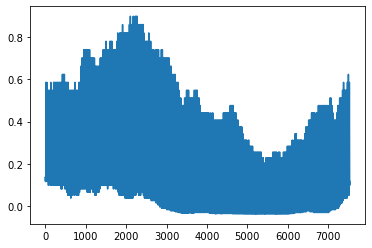

In [25]:
plt.plot(X['AWT26_Power(albany)'])

In [26]:
X.columns

Index(['AWT26_Power(albany)', 'AWP_200_Power(albany)',
       'D2CF_200_Power(albany)', 'AN_Bonus_150/30_Power(albany)',
       'Aria_20_Power(albany)', 'WWD-1_D64_Power(albany)',
       'Solar_AllMax(albany)', 'Solar_TrinaSolar(albany)',
       'Solar_Mitsubishi(albany)', 'Solar_FirstSolar(albany)',
       'AWT26_Power(buffalo)', 'AWP_200_Power(buffalo)',
       'D2CF_200_Power(buffalo)', 'AN_Bonus_150/30_Power(buffalo)',
       'Aria_20_Power(buffalo)', 'WWD-1_D64_Power(buffalo)',
       'AWT26_Power(binghamton)', 'AWP_200_Power(binghamton)',
       'D2CF_200_Power(binghamton)', 'AN_Bonus_150/30_Power(binghamton)',
       'Aria_20_Power(binghamton)', 'WWD-1_D64_Power(binghamton)',
       'AWT26_Power(rochester)', 'AWP_200_Power(rochester)',
       'D2CF_200_Power(rochester)', 'AN_Bonus_150/30_Power(rochester)',
       'Aria_20_Power(rochester)', 'WWD-1_D64_Power(rochester)',
       'AWT26_Power(nyc)', 'AWP_200_Power(nyc)', 'D2CF_200_Power(nyc)',
       'AN_Bonus_150/30_Power(nyc)', '

In [27]:
best_solution[0][0]

array([  132.,   132.,   372.,   376., 13757.,   235.,   334.,   556.,
         470.,   563.,   764.,   265.,   635.,   677.,  5133.,   627.,
        1490.,   508.,   751.,   436.,  6649.,   424.,   208.,  1136.,
         373.,   537.,  5582.,   179.,   297.,  1202.,   826.,   923.,
        9153.,   168.])